In [2]:
import pandas as pd 
import numpy as np 


###  1. Импорт библиотек      

Импортируются ключевые библиотеки для работы с данными: pandas  для таблиц и обработки, numpy для числовых операций.

### 2. Загрузка датасета
Загружаем CSV-файл с данными о студентах и их поведении в соцсетях. Файл должен находиться в той же папке, что и ноутбук.

In [ ]:
data = pd.read_csv('Students Social Media Addiction.csv')   

In [4]:
data.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
target = 'Mental_Health_Score'


### Определение признаков (features)
Выделяем числовые и категориальные признаки, на которых модель будет учиться. Они описывают поведение, пол, страну и т.п.

In [6]:
numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night']
categorical_features = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance']
features = numerical_features + categorical_features


In [7]:
data.isnull().sum()


Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

###  Импорт CatBoost и метрик

Импортируем модель CatBoost для регрессии и нужные инструменты для разбиения данных и оценки качества модели.

In [8]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


### Делим данные на train и test

Делим весь датасет: 80% для обучения, 20% для проверки. Это стандартный шаг в ML, чтобы не переобучить модель. 

In [9]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Обучение модели


Создаем объект модели и обучаем её. cat_features указывает, какие признаки категориальные.

In [10]:
model = CatBoostRegressor(cat_features=categorical_features, verbose=0)
model.fit(X_train, y_train)


### Предсказания и метрики
Модель делает предсказания на тестовой части, и мы считаем метрики качества. Чем выше R² и ниже MAE  тем лучше.



In [11]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.17715657902085993
R²: 0.9412589727534054


### Важность признаков
Показываем, какие признаки больше всего влияют на предсказание. Это нужно для анализа и интерпретации модели.
Эти метрики показывают, что модель может точно предсказывать субъективную оценку ментального здоровья студентов на основе их поведения в соцсетях.

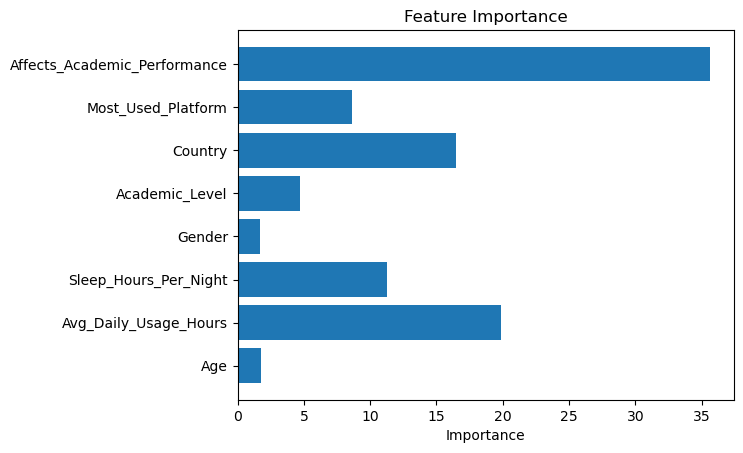

In [ ]:
import matplotlib.pyplot as plt

feature_importances = model.get_feature_importance()
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()
    

In [ ]:

y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})


comparison_df.reset_index(drop=True, inplace=True)

comparison_df.head(3)


,Actual,Predicted
0,7,7.007433
1,6,5.862085
2,7,7.072255


In [14]:
comparison_df_rounded = comparison_df.round(2)
comparison_df_rounded.head(3)


,Actual,Predicted
0,7,7.01
1,6,5.86
2,7,7.07


 модель, которая предсказывает Mental_Health_Score на основе поведенческих и демографических данных студентов. 
 